In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import statsmodels.formula.api as smf



In [3]:
# create one dataset for 2007 and 2008

df_2007 = pd.read_csv('2007.csv.bz2')
df_2008 = pd.read_csv('2008.csv.bz2')
df = pd.concat([df_2007, df_2008])

## Exploration

In [6]:
#number of rows and columns
print df.shape
# columns
list(df)

(14462943, 29)


['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'UniqueCarrier',
 'FlightNum',
 'TailNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Origin',
 'Dest',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']

In [7]:
# number of rows that contain NAs
df.shape[0] - df.dropna().shape[0]

14462942

In [8]:
# list of carriers
df.UniqueCarrier.unique()

array(['WN', 'XE', 'YV', 'OH', 'OO', 'UA', 'US', 'DL', 'EV', 'F9', 'FL',
       'HA', 'MQ', 'NW', '9E', 'AA', 'AQ', 'AS', 'B6', 'CO'], dtype=object)

### Number of flights by carrier

In [9]:
flights = df.groupby('UniqueCarrier').size().sort_values(axis=0, ascending=False)
flights

UniqueCarrier
WN    2370625
AA    1238742
OO    1165041
MQ    1031187
UA     939517
US     939036
DL     927820
XE     809283
NW     762178
CO     621606
EV     566809
YV     549292
FL     524843
9E     521059
OH     431394
B6     387541
AS     311287
F9     193522
HA     118001
AQ      54160
dtype: int64

## Southwest Airlines (WN) characterization

### Market share of the biggest airlines measured by the number of flights

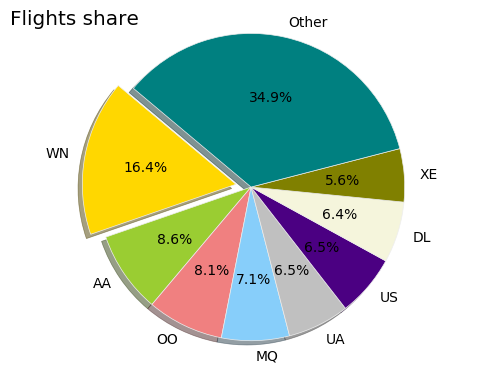

In [10]:
#Pie chart

labels = flights.index[0], flights.index[1], flights.index[2], flights.index[3], flights.index[4], flights.index[5], flights.index[6], flights.index[7],'Other'
sizes = [flights.iloc[0], flights.iloc[1], flights.iloc[2],flights.iloc[3],flights.iloc[4],flights.iloc[5], flights.iloc[6], flights.iloc[7], sum(flights.iloc[8:])]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'silver', 'indigo', 'beige', 'olive', 'teal']
explode = (0.1, 0, 0, 0, 0, 0,0,0,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Flights share', loc ='left')
plt.show()

In [11]:
# creating dataset for WN only
df_wn = df[df['UniqueCarrier']== 'WN']

In [13]:
# number of rows and columns of the dataset
df_wn.shape

(2370625, 29)

### Selected metrics describing Southwest

In [28]:
#Stats for WN

# number and ratio of flights cancelled
number_cancelled =  df_wn['Cancelled'][df_wn['Cancelled']== 1].count()
number_not_cancelled =  df_wn['Cancelled'][df_wn['Cancelled']== 0].count()
print 'Number of cancelled flights: ' + str(number_cancelled)
print 'Number of flights there were not cancelled: ' + str(number_not_cancelled)
print 'Ratio of cancelled flights: ' + \
str (round(float(number_cancelled) / (number_cancelled + number_not_cancelled) * 100, 2)) + '%' '\n'

# number and ratio of delayed flights
on_time = df_wn['ArrTime'][df_wn['ArrTime'] <= df_wn['CRSArrTime']].count()
late = df_wn['ArrTime'][df_wn['ArrTime'] > df_wn['CRSArrTime']].count()
print 'Number of flights on time: ' + str(on_time)
print 'Number of delayed flights: ' + str(late)
print 'Ratio of delayed flights: ' + \
str (round(float(late) / (late + on_time) * 100, 2)) + '%' '\n'

# average arrival delay
print 'Average arrival delay (in minutes) amounts to: '  + str(round(np.mean(df_wn['ArrDelay']), 2))

# average distance
print 'Average distance (in miles) amounts to: '  + str(round(np.mean(df_wn['Distance']), 2))


Number of cancelled flights: 22382
Number of flights there were not cancelled: 2348243
Ratio of cancelled flights: 0.94%

Number of flights on time: 1402110
Number of delayed flights: 942182
Ratio of delayed flights: 40.19%

Average arrival delay (in minutes) amounts to: 5.32
Average distance (in miles) amounts to: 632.14


### Most popular connections served by Southwest

In [29]:
connections_df = pd.DataFrame(df_wn.groupby(['Origin', 'Dest']).size())
connections_df.reset_index(inplace=True)
connections_df.columns = ['Origin', 'Dest', 'flight_count']
connections_df.sort_values(by = 'flight_count', ascending=False).head(10)

,Origin,Dest,flight_count
273,HOU,DAL,19424
181,DAL,HOU,19421
401,LAX,OAK,13904
566,OAK,LAX,13869
574,OAK,SAN,12743
747,SAN,OAK,12737
663,PHX,LAS,12706
373,LAS,PHX,12588
560,OAK,BUR,11031
115,BUR,OAK,11025


### Number of flights served by Soutwest by the day of week

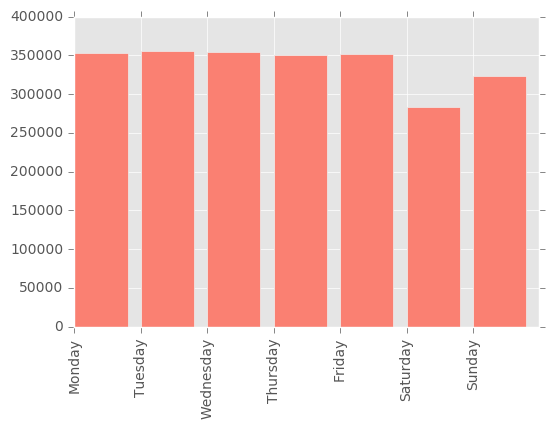

In [40]:
DOW = pd.DataFrame(df_wn.groupby('DayOfWeek').size())
DOW.reset_index(inplace=True)
dow_dict = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
DOW['label'] = DOW['DayOfWeek'].map(dow_dict)
DOW.rename(columns={0:'count_flights'}, inplace=True)
plt.bar(DOW.DayOfWeek, DOW.count_flights, color='salmon')
plt.xticks(range(1,len(DOW.label)+1), DOW.label, rotation='vertical')
plt.show()

**Comment: ** _Very little variability during the week. The significant drop appears on the weekend, especially on Saturday_

In [32]:
#preparing time series
df_wn_time_series = df_wn.groupby(['Year', 'Month']).size()
df_wn_months=pd.DataFrame(df_wn_time_series)
df_wn_months.reset_index(inplace=True)
df_wn_months['year_month'] = df_wn_months["Year"].map(str) + '_' + df_wn_months["Month"].map(str)

### Number of flights served by Northwest in 2007 and 2008 

#### Progress in time

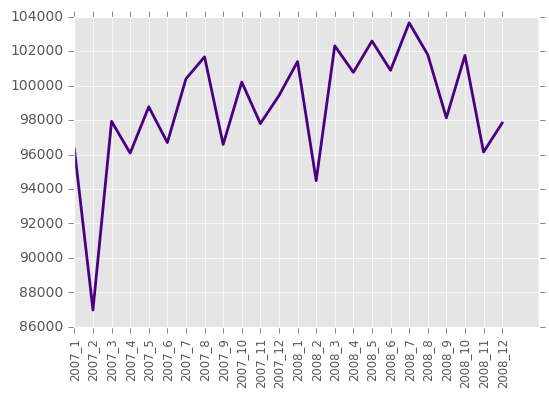

In [33]:
plt.plot(df_wn_months.iloc[:,2],  linewidth=2, color='indigo')
plt.xticks(range(len(df_wn_months.iloc[:,3])), df_wn_months.iloc[:,3], size='small', rotation='vertical')
plt.show()

#### Year to year

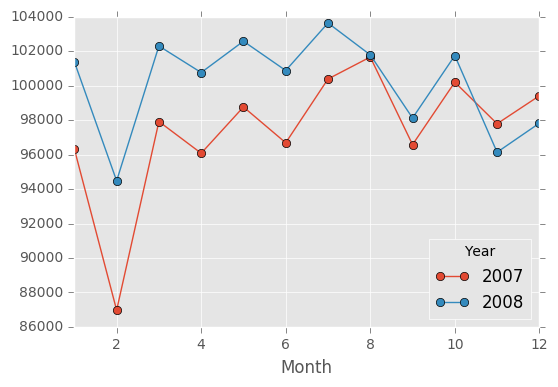

In [36]:
df_wn_months.rename(columns={0: 'count_flights'}, inplace=True)
df_wn_months.pivot('Month', 'Year', 'count_flights').plot(kind='line', marker='o')

## Factors that play role in the arrival delay (all carriers)

### Linear regression 

In [38]:
# linear regression for all carriers 
lm = smf.ols(formula='ArrDelay ~ DepDelay + Distance + AirTime', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                 3.483e+07
Date:                Sun, 09 Jul 2017   Prob (F-statistic):               0.00
Time:                        17:38:18   Log-Likelihood:            -5.6760e+07
No. Observations:            14130317   AIC:                         1.135e+08
Df Residuals:                14130313   BIC:                         1.135e+08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -6.0498      0.007   -829.107      0.000        -6.064    -6.036
DepDelay       1.0167      0.000   1.01e+04      0.000         1.017     1.017
Distance      -0.0354   2.83e-05  -1250.666      0.000        -0.035    -0.035
AirTime        0.2910      0.000   1238.538      0.000         0.290     0.291
==============================================================================
Omnibus:                  9765539.956   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        517579713.493
Skew:                           2.737   Prob(JB):                         0.00
Kurtosis:                      32.140   Cond. No.                     1.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Comment: ** _Not surprisingly the most important factor in explaining **Arrival Delay** is **Departure Delay**. Other factors: Distance and Air Time don't play significant role in explanation. When used on their own, they explained hardly any variation of Arrival Delay (measured by R2). It's interesting, because one might expect that delay can be reduced (or extended) during the longer flights, but it doesn't show in the aggregated data. Apparently, the flights themselves are rather consistent with the schedule._

### Relation between Arrival and Departutre Delay

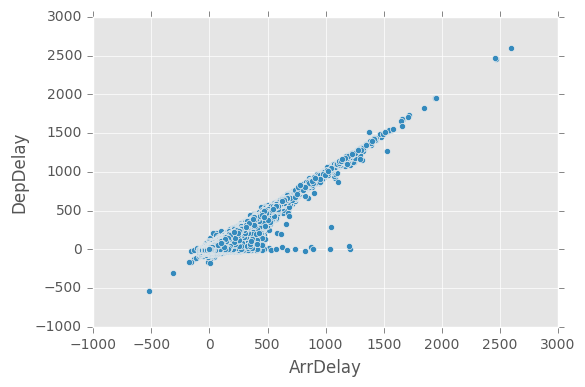

In [51]:

df.plot(kind='scatter', x='ArrDelay', y='DepDelay')


**Comment: ** _As illustrated, Arrival Delay is very closely correlated with Departure Delay. Not surprising, but depicting how rarely there are significant differences between the two_